In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
import scipy.io as sio
path = './handwritingBCIData/Datasets/t5.2019.05.08/singleLetters.mat'

data = sio.loadmat(path)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Dec 26 22:47:42 2020',
 '__version__': '1.0',
 '__globals__': [],
 'neuralActivityCube_doNothing': array([[[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 1, 0, ..., 0, 0, 1],
         [0, 1, 1, ..., 1, 0, 1],
         [0, 1, 0, ..., 1, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1],
         ...,
         [1, 0, 0, ..., 0, 0, 2],
         [0, 1, 0, ..., 1, 0, 1],
         [0, 1, 0, ..., 0, 0, 1]],
 
        [[0, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 1, 0, 3],
         [0, 1, 0, ..., 0, 0, 1]],
 
        ...,
 
        [[1, 1, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 2, 0, ..., 0, 0, 0],
 

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'neuralActivityCube_doNothing', 'neuralActivityCube_a', 'neuralActivityCube_b', 'neuralActivityCube_c', 'neuralActivityCube_d', 'neuralActivityCube_t', 'neuralActivityCube_m', 'neuralActivityCube_o', 'neuralActivityCube_e', 'neuralActivityCube_f', 'neuralActivityCube_g', 'neuralActivityCube_h', 'neuralActivityCube_i', 'neuralActivityCube_j', 'neuralActivityCube_k', 'neuralActivityCube_l', 'neuralActivityCube_n', 'neuralActivityCube_p', 'neuralActivityCube_q', 'neuralActivityCube_r', 'neuralActivityCube_s', 'neuralActivityCube_u', 'neuralActivityCube_v', 'neuralActivityCube_w', 'neuralActivityCube_x', 'neuralActivityCube_y', 'neuralActivityCube_z', 'neuralActivityCube_greaterThan', 'neuralActivityCube_comma', 'neuralActivityCube_apostrophe', 'neuralActivityCube_tilde', 'neuralActivityCube_questionMark', 'neuralActivityTimeSeries', 'clockTimeSeries', 'blockNumsTimeSeries', 'blockList', 'blockStartDates', 'goPeriodOnsetTimeBin', 'dela

In [4]:
data['neuralActivityCube_a'].shape #trial x time x electrode

(27, 201, 192)

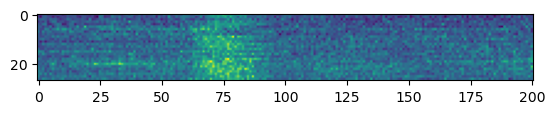

In [5]:
# PCA
from sklearn.decomposition import PCA

X = data['neuralActivityCube_a']
pca = PCA(n_components=3)
T = pca.fit_transform(X.reshape(-1, X.shape[-1]))

plt.imshow(T.reshape(*X.shape[:-1],-1)[...,1])

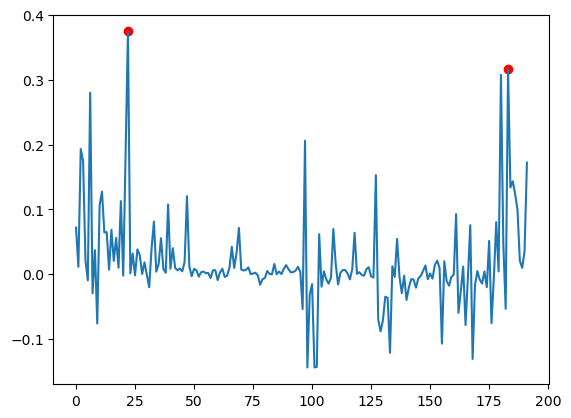

In [6]:

argsort = np.argsort(pca.components_[1])

plt.plot(pca.components_[1])
plt.scatter(argsort[-1], pca.components_[1][argsort[-1]], c='r')
plt.scatter(argsort[-2], pca.components_[1][argsort[-2]], c='r')

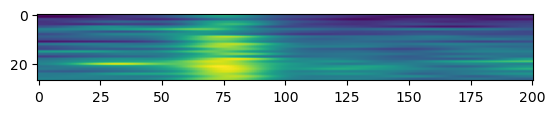

In [7]:
# gauss filter with 100 ms bin
from scipy.ndimage import gaussian_filter1d

X_filtered = gaussian_filter1d(X.astype('float'), 10, axis=1)
T = pca.transform(X_filtered.reshape(-1, X.shape[-1]))

plt.imshow(T.reshape(*X.shape[:-1],-1)[...,1])

In [56]:
76*3

228

Text(0.5, 1.0, 'Responses of 2 neurons during \n attempted writing of letter "A"')

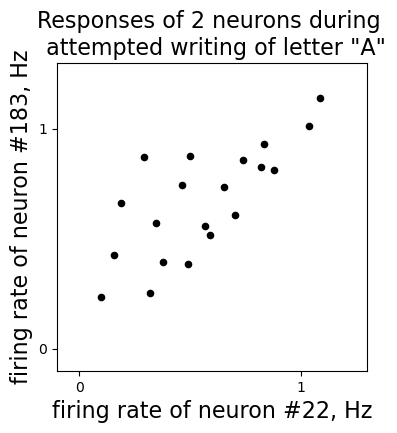

In [219]:
plt.figure(figsize=(4,4))
s = 20
skip = 276 #276
plt.scatter(X_filtered[...,argsort[-1]].flatten()[::skip], 
            X_filtered[...,argsort[-2]].flatten()[::skip], s=s, alpha=1,c='k')

plt.xlim([-0.1,1.3])
plt.ylim([-0.1,1.3])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('firing rate of neuron #{}, Hz'.format(argsort[-1]),fontsize=16)
plt.ylabel('firing rate of neuron #{}, Hz'.format(argsort[-2]),fontsize=16)
plt.title('Responses of 2 neurons during \n attempted writing of letter "A"',fontsize=16)

In [148]:
x_flat = X_filtered.reshape(-1, X.shape[-1])[::skip,argsort[-2:]].T # neurons x time
mu = x_flat.mean(axis=-1,keepdims=True)
n_trials = x_flat.shape[-1]
x_centered = x_flat - mu
cov = x_centered @ x_centered.T / n_trials  # TODO: remove solution
cov

array([[0.06038074, 0.05066728],
       [0.05066728, 0.07774628]])

In [149]:
from numpy.linalg import eig, eigh

def descending_eigh(X):
    """
    A function that sort the eigenvectors in descending orddr.
    ----------
    X: input matrix (np.ndarray)
    """
    w, v = eigh(X)

    # reorder in descending eigenvalue order
    sort = np.argsort(w)[::-1]
    w, v = w[sort], v[:, sort]

    return (w, v)

(𝜆, v) = descending_eigh(cov)
𝜆

array([0.12046938, 0.01765764])

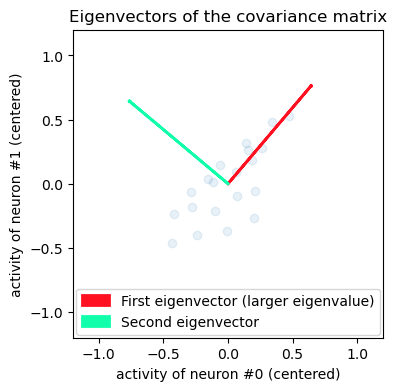

In [150]:
plt.figure(figsize=(4, 4))
plt.scatter(*x_centered, alpha=0.1)
plt.arrow(
    0,
    0,
    *(v[:, 0]),
    color="#FF1122",
    linewidth=2,
    label="First eigenvector (larger eigenvalue)"
)
plt.arrow(0, 0, *(v[:, 1]), color="#11FFAA", linewidth=2, label="Second eigenvector")
plt.xlabel("activity of neuron #0 (centered)")
plt.ylabel("activity of neuron #1 (centered)")
plt.title("Eigenvectors of the covariance matrix")
r = 1.2  # plot range
plt.xlim([-r, r])
plt.ylim([-r, r])
plt.legend(loc=(0.01, 0.01))
plt.show()

2.6603878990974774


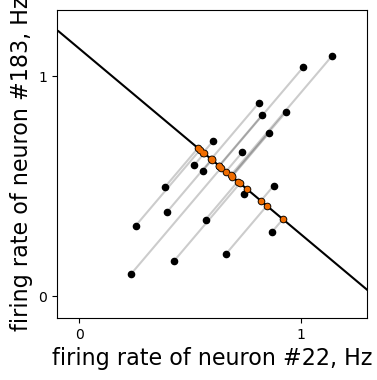

In [229]:
plt.figure(figsize=(4,4))
s = 20
w = 1 # which
x = X_filtered[...,argsort[-2:]].reshape(-1,2)[::skip]
mu = x.mean(0,keepdims=True)

plt.plot(*np.array([mu[0]-v[:,w],mu[0]+v[:,w]]).T,c='k',alpha=1)

x_centered = (x - mu).T
plt.scatter(*x.T, s=s, alpha=1, c='k')
# plt.scatter(*x.T, s=s*0.5, alpha=1, c='w')


plt.xlim([-0.1,1.3])
plt.ylim([-0.1,1.3])
plt.xticks([0,1])
plt.yticks([0,1])

x_rot = ((v.T)@((x - x.mean(0,keepdims=True)).T))
if w ==0:
    x_rot[1] = - x_rot[1]
    x_proj = x_rot.copy()
    x_proj[1] = 0
else:
    x_rot[0] = - x_rot[0]
    x_proj = x_rot.copy()
    x_proj[0] = 0
x_proj = v@x_proj # project back

for i in range(x_proj.shape[-1]):
    plt.plot(*[[x_proj[j,i]+mu[0,j],x_centered[j,i]+mu[0,j]] for j in range(2)],c='k',alpha=0.2)

plt.scatter(x_proj[0]+mu[0,0],x_proj[1]+mu[0,1], s=s, alpha=1,c='k',zorder=2)
plt.scatter(x_proj[0]+mu[0,0],x_proj[1]+mu[0,1], s=s*0.5, alpha=1,c='#ef6c00',zorder=2)

plt.xlabel('firing rate of neuron #{}, Hz'.format(argsort[-1]),fontsize=16)
plt.ylabel('firing rate of neuron #{}, Hz'.format(argsort[-2]),fontsize=16)
# plt.title('Responses of 2 neurons during \n attempted writing of letter "A"',fontsize=16)

print(np.sum((x_rot - x_proj)**2))

In [230]:
np.sum((x_proj-x_centered)**2)

2.409387615448285

0.35315274715385664


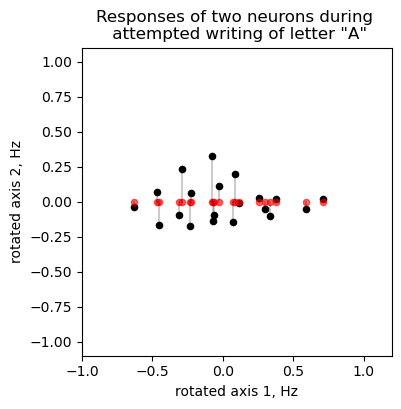

In [203]:
plt.figure(figsize=(4,4))
s = 20
x = X_filtered[...,argsort[-2:]].reshape(-1,2)[::skip]
x_rot = ((v.T)@((x - x.mean(0,keepdims=True)).T))
x_rot[1] = - x_rot[1]
plt.scatter(*x_rot, s=s, alpha=1, c='k')

plt.xlim([-1,1.2])
plt.ylim([-1.1,1.1])
# plt.xticks([0,1,2])
# plt.yticks([0,1,2])
# plt.axhline(0,c='k')

x_proj = x_rot.copy()
x_proj[1] = 0
for i in range(x_proj.shape[-1]):
    plt.plot(*[[x_proj[j,i],x_rot[j,i]] for j in range(2)],c='k',alpha=0.2)

plt.scatter(x_proj[0],x_proj[1] , s=s, alpha=.6,c='red')
plt.xlabel('rotated axis 1, Hz')
plt.ylabel('rotated axis 2, Hz')
plt.title('Responses of two neurons during \n attempted writing of letter "A"')

print(np.sum((x_rot - x_proj)**2))

0.35315274715385664


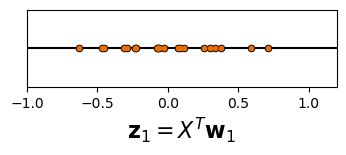

In [236]:
plt.figure(figsize=(4,1))
s = 20
x = X_filtered[...,argsort[-2:]].reshape(-1,2)[::skip]
x_rot = ((v.T)@((x - x.mean(0,keepdims=True)).T))
x_rot[1] = - x_rot[1]
# plt.scatter(*x_rot, s=s, alpha=1, c='k')
plt.axhline(0,c='k')

plt.xlim([-1,1.2])
plt.ylim([-1.1,1.1])
plt.yticks([])

x_proj = x_rot.copy()
x_proj[1] = 0
plt.scatter(x_proj[0],x_proj[1] , s=s, alpha=1,c='k',zorder=2)
plt.scatter(x_proj[0],x_proj[1] , s=s*0.5, alpha=1,c='#ef6c00',zorder=2)
plt.xlabel(r'$\mathbf{z}_1 = X^T\mathbf{w}_1$',fontsize=16)
plt.ylabel('')

print(np.sum((x_rot - x_proj)**2))

3.4773957842556498


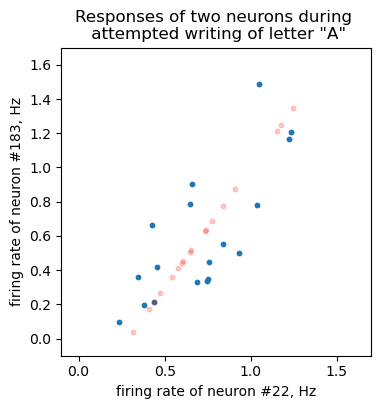

In [130]:
plt.figure(figsize=(4,4))
s = 10
x = X_filtered[...,argsort[-2:]].reshape(-1,2)[::skip]
x_rot = ((v.T)@((x - x.mean(0,keepdims=True)).T))
x_rot[1] = - x_rot[1]
plt.scatter(*x.T, s=s, alpha=1)

plt.xlim([-0.1,1.7])
plt.ylim([-0.1,1.7])

x_proj = x_rot.copy()
x_proj[1] = 0
# x_proj[0] = x_proj[0]
x_proj = v@x_proj
# x_proj += x.mean(0,keepdims=True
plt.scatter(x_proj[0]+x.mean(0)[0],x_proj[1] + x.mean(0)[1] , s=s, alpha=.2,c='red')
plt.xlabel('firing rate of neuron #{}, Hz'.format(argsort[-1]))
plt.ylabel('firing rate of neuron #{}, Hz'.format(argsort[-2]))
plt.title('Responses of two neurons during \n attempted writing of letter "A"')


print(np.sum((x_rot - x_proj)**2))

## PCA on all letters

In [13]:
from sklearn.decomposition import PCA

data_all = []
counter = 0
for k in data.keys():
    # if k.split('_')[0] == 'neuralActivityCube':
    if k[:-2] == 'neuralActivityCube':    
        X = data[k]
        print(k, X.shape)
        counter+= 1

        data_all.append(X.reshape(-1, X.shape[-1]))

data_all = np.concatenate(data_all, axis=0)
# data_all.shape
# z-score
# data_all = (data_all - data_all.mean(axis=0)) / data_all.std(axis=0)
data_all = data_all - data_all.mean(axis=0)

pca = PCA()
T = pca.fit(data_all)

neuralActivityCube_a (27, 201, 192)
neuralActivityCube_b (27, 201, 192)
neuralActivityCube_c (27, 201, 192)
neuralActivityCube_d (27, 201, 192)
neuralActivityCube_t (27, 201, 192)
neuralActivityCube_m (27, 201, 192)
neuralActivityCube_o (27, 201, 192)
neuralActivityCube_e (27, 201, 192)
neuralActivityCube_f (27, 201, 192)
neuralActivityCube_g (27, 201, 192)
neuralActivityCube_h (27, 201, 192)
neuralActivityCube_i (27, 201, 192)
neuralActivityCube_j (27, 201, 192)
neuralActivityCube_k (27, 201, 192)
neuralActivityCube_l (27, 201, 192)
neuralActivityCube_n (27, 201, 192)
neuralActivityCube_p (27, 201, 192)
neuralActivityCube_q (27, 201, 192)
neuralActivityCube_r (27, 201, 192)
neuralActivityCube_s (27, 201, 192)
neuralActivityCube_u (27, 201, 192)
neuralActivityCube_v (27, 201, 192)
neuralActivityCube_w (27, 201, 192)
neuralActivityCube_x (27, 201, 192)
neuralActivityCube_y (27, 201, 192)
neuralActivityCube_z (27, 201, 192)


Text(0, 0.5, 'eigenvalue')

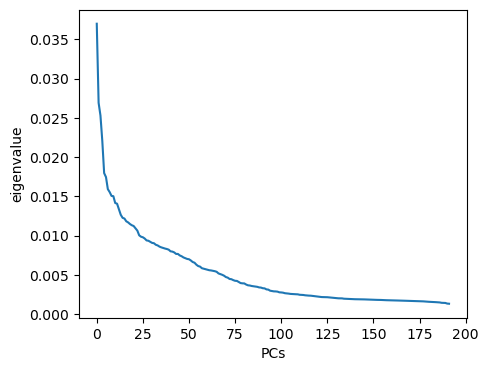

In [14]:
# scree plot
plt.figure(figsize=(5,4))
plt.plot(pca.explained_variance_ratio_)
# plt.xlim([0,100])
plt.xlabel('PCs')
plt.ylabel('eigenvalue')
# plt.axvline(counter)

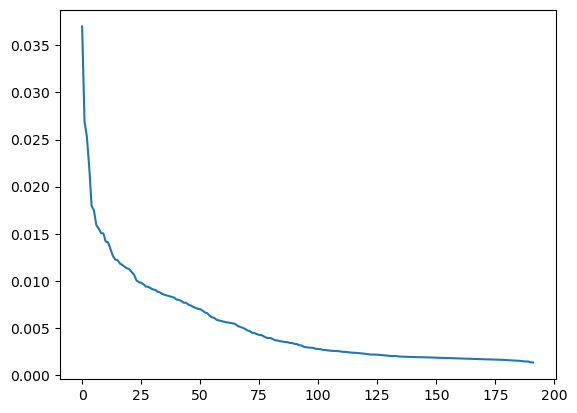

In [15]:
plt.plot(pca.explained_variance_ratio_)

Text(0, 0.5, 'variance explained, %')

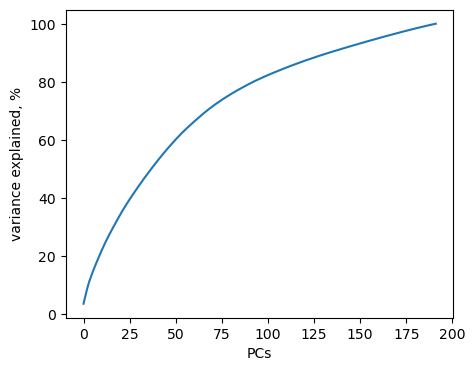

In [16]:
# variance explained
plt.figure(figsize=(5,4))
plt.plot(100*np.cumsum(pca.explained_variance_ratio_) / np.sum(pca.explained_variance_ratio_))
# plt.xlim([0,100])
plt.xlabel('PCs')
plt.ylabel('variance explained, %')

In [17]:
np.cumsum(pca.explained_variance_ratio_[:26]) / np.sum(pca.explained_variance_ratio_)

array([0.03700466, 0.06393125, 0.08924004, 0.11130538, 0.12927866,
       0.14673902, 0.16266811, 0.17821662, 0.1932857 , 0.20831259,
       0.22247512, 0.23655085, 0.24990742, 0.26257223, 0.27484739,
       0.28702944, 0.29885926, 0.31054903, 0.32203348, 0.33336254,
       0.34459151, 0.35551651, 0.36615923, 0.37620414, 0.38607131,
       0.3958656 ])

In [33]:
# sample from poisson
for a in np.random.poisson(2,size=5*16).reshape(16,5):
    str = ''
    for b in a:
        str = str+' '+b.astype('str')
    print(str)

 0 2 2 0 1
 3 1 0 1 3
 1 3 5 1 3
 2 4 3 1 1
 2 3 1 1 1
 1 2 1 2 1
 3 6 4 0 3
 2 1 1 2 3
 2 5 2 0 3
 6 3 2 1 1
 3 2 3 0 3
 1 3 1 3 1
 1 2 3 0 3
 3 0 3 2 4
 1 0 2 3 3
 3 3 1 1 0


### Count assemblies using Marchenko-Pastur distribution for a threshold

In [146]:
n,m = data_all.shape

print(np.sqrt(m/n))

np.sum(pca.explained_variance_ > 1 + np.sqrt(m/n))


0.03325031120358776


36

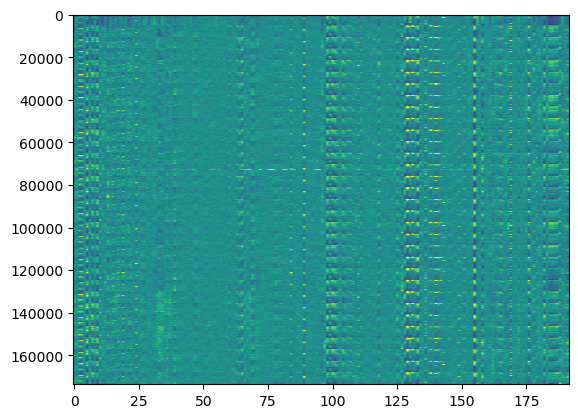